# Benchmarking of Sleep/Wake Detection Algorithms on a Large Cohort using Actigraphy, HRV and Respiration Information

**This notebook gives a detailed overview over the results presented in the Paper "Benchmarking of Sleep/Wake Detection Algorithms on a Large Cohort using Actigraphy, HRV and Respiration Information" submitted to the IEEE-EMBS International Conference on Biomedical and Health Informatics**

## Setup and Helper Functions

In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import biopsykit as bp
from biopsykit.utils.dataframe_handling import multi_xs
from biopsykit.stats import StatsPipeline

from fau_colors import cmaps

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [3]:
plt.close("all")

palette = sns.color_palette(cmaps.faculties)
sns.set_theme(context="notebook", style="ticks", font="sans-serif", palette=palette)

plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["mathtext.default"] = "regular"

palette

[(0.0, 0.1843137254901961, 0.4235294117647059),
 (0.4666666666666667, 0.6235294117647059, 0.7098039215686275),
 (1.0, 0.7215686274509804, 0.10980392156862745),
 (0.0, 0.6392156862745098, 0.8784313725490196),
 (0.2627450980392157, 0.6901960784313725, 0.16470588235294117),
 (0.7843137254901961, 0.06274509803921569, 0.1803921568627451)]

## Goal of this work
- Systematically compare state-of-the-art ML and DL algorithms
- Examine wheter the inclusion of respiratory information to the commonly used Actigraphy or Actigraphy + HRV appraoches further improves classification performance

_As this repository only presents the results in detail, the train and test steps are not presented_

## Load result data

In [4]:
# read result dataframe in long format
df = pd.read_pickle(Path.cwd().joinpath("full_result_df.pkl"))

In [5]:
# display full result dataframe
df

data
algorithm type algorithm modality        subject metric              
DL             LSTM      ACT             0027    accuracy   94.736842
                                                 f1         97.206704
                                                 kappa       0.519717
                                                 precision  95.604396
                                                 recall     98.863636
...                                                               ...
ML             XGBoost   ACT + HRV + RRV 6807    f1         82.040230
                                                 kappa       0.477843
                                                 precision  95.805369
                                                 recall     71.733668
                                                 specifity  89.711934

[43848 rows x 1 columns]

## Result of Algorithms and Modalities according to Performance metrics

In [6]:
# calculate mean & std
result_df = df.groupby(["algorithm type", "algorithm","modality", "metric"])

In [7]:
# shape DataFrame
mean_std_df = result_df.agg(
    ["mean","std"]
)
mean_std_df = mean_std_df.unstack("metric")

In [8]:
# reshape DataFrame and include ±
mean_std_df = mean_std_df.droplevel(0,axis=1)
pd.DataFrame("$" + mean_std_df["mean"].round(decimals=2).astype(str) + " \pm " + mean_std_df["std"].round(decimals=2).astype(str) + "\%$")

metric                                                   accuracy  \
algorithm type algorithm     modality                               
DL             LSTM          ACT               $80.3 \pm 11.06\%$   
                             ACT + HRV         $83.17 \pm 9.73\%$   
                             ACT + HRV + RRV  $83.59 \pm 10.02\%$   
               TCN           ACT              $79.23 \pm 10.91\%$   
                             ACT + HRV          $80.7 \pm 10.3\%$   
                             ACT + HRV + RRV   $80.16 \pm 9.18\%$   
ML             AdaBoost      ACT               $80.83 \pm 10.8\%$   
                             ACT + HRV         $81.5 \pm 10.62\%$   
                             ACT + HRV + RRV   $83.81 \pm 9.26\%$   
               MLP           ACT              $80.95 \pm 10.74\%$   
                             ACT + HRV        $82.08 \pm 10.52\%$   
                             ACT + HRV + RRV    $85.14 \pm 8.5\%$   
               Random Forest ACT              $80.85 \pm 10.72\%$   
                             ACT + HRV        $81.55 \pm 10.58\%$   
                             ACT + HRV + RRV   $83.99 \pm 9.39\%$   
               SVM           ACT              $80.46 \pm 11.15\%$   
                             ACT + HRV         $80.8 \pm 11.11\%$   
                             ACT + HRV + RRV   $82.7 \pm 10.19\%$   
               XGBoost       ACT              $81.13 \pm 10.67\%$   
                             ACT + HRV        $82.08 \pm 10.53\%$   
                             ACT + HRV + RRV    $84.91 \pm 8.6\%$   

metric                                                         f1  \
algorithm type algorithm     modality                               
DL             LSTM          ACT               $86.19 \pm 9.49\%$   
                             ACT + HRV          $87.36 \pm 9.1\%$   
                             ACT + HRV + RRV  $87.33 \pm 10.26\%$   
               TCN           ACT               $85.07 \pm 9.84\%$   
                             ACT + HRV           $85.8 \pm 9.6\%$   
                             ACT + HRV + RRV    $85.36 \pm 8.9\%$   
ML             AdaBoost      ACT              $85.34 \pm 10.11\%$   
                             ACT + HRV          $85.8 \pm 9.84\%$   
                             ACT + HRV + RRV     $87.3 \pm 9.2\%$   
               MLP           ACT               $85.64 \pm 9.78\%$   
                             ACT + HRV         $86.31 \pm 9.63\%$   
                             ACT + HRV + RRV   $88.37 \pm 8.31\%$   
               Random Forest ACT                $85.41 \pm 9.9\%$   
                             ACT + HRV         $85.91 \pm 9.68\%$   
                             ACT + HRV + RRV   $87.51 \pm 9.32\%$   
               SVM           ACT              $85.13 \pm 10.65\%$   
                             ACT + HRV        $85.39 \pm 10.54\%$   
                             ACT + HRV + RRV  $86.38 \pm 10.54\%$   
               XGBoost       ACT                $85.6 \pm 9.83\%$   
                             ACT + HRV         $86.26 \pm 9.66\%$   
                             ACT + HRV + RRV   $88.22 \pm 8.43\%$   

metric                                                    kappa  \
algorithm type algorithm     modality                             
DL             LSTM          ACT              $0.43 \pm 0.25\%$   
                             ACT + HRV        $0.56 \pm 0.21\%$   
                             ACT + HRV + RRV  $0.58 \pm 0.21\%$   
               TCN           ACT              $0.42 \pm 0.25\%$   
                             ACT + HRV        $0.49 \pm 0.21\%$   
                             ACT + HRV + RRV  $0.48 \pm 0.19\%$   
ML             AdaBoost      ACT              $0.52 \pm 0.24\%$   
                             ACT + HRV        $0.54 \pm 0.23\%$   
                             ACT + HRV + RRV   $0.61 \pm 0.2\%$   
               MLP           ACT              $0.52 \pm 0.24\%$   
                    

In [9]:
# method to highlight the maximum value for each performance measure
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
mean_std_df = mean_std_df.drop("std", axis=1)

## Best Performance
### Highlight the algorithms with the best mean performance for each performance measure

In [10]:
#mean_std_df.droplevel(0,axis=1).to_markdown()

algorithm      |     modality   |   accuracy |      f1 |    kappa |   precision |   recall |   specifity
---------------|----------------|------------|---------|----------|-------------|----------|-------------   
LSTM           | ACT            |    80.3047 | 86.1903 | 0.426715 |     81.6588 |  <span style="color:blue">92.8255</span> |     47.4888 
LSTM           | ACT + HRV      |    83.1747 | 87.3637 | 0.558174 |     87.4002 |  88.9779 |     68.8153 
LSTM           | ACT + HRV + RRV|    83.5889 | 87.3272 | 0.577295 |     <span style="color:blue">88.6578</span> |  87.9019 |     <span style="color:blue">72.648</span>  
TCN            | ACT            |    79.234  | 85.0725 | 0.415129 |     82.0355 |  89.9035 |     50.287  
TCN            | ACT + HRV      |    80.701  | 85.7959 | 0.491507 |     84.7321 |  88.7238 |     61.8502 
TCN            | ACT + HRV + RRV|    80.1615 | 85.3633 | 0.476578 |     84.7982 |  87.6529 |     62.2398 
AdaBoost       | ACT            |    80.8281 | 85.3374 | 0.520834 |     82.1802 |  90.3909 |     60.357  
AdaBoost       | ACT + HRV      |    81.503  | 85.7991 | 0.542874 |     83.0592 |  90.4026 |     62.9768 
AdaBoost       | ACT + HRV + RRV|    83.8098 | 87.3043 | 0.60913  |     85.3958 |  90.7102 |     70.2255 
MLP            | ACT            |    80.9503 | 85.636  | 0.519293 |     81.7233 |  91.4489 |     58.829  
MLP            | ACT + HRV      |    82.0795 | 86.3108 | 0.556426 |     83.3031 |  91.0958 |     63.5039 
MLP            | ACT + HRV + RRV|    <span style="color:blue">85.1422</span> | <span style="color:blue">88.3742</span> | <span style="color:blue">0.640318</span> |     86.3677 |  91.7068 |     72.4066 
Random Forest  | ACT            |    80.8516 | 85.4108 | 0.521025 |     82.1846 |  90.4348 |     60.4343 
Random Forest  | ACT + HRV      |    81.5534 | 85.9136 | 0.54293  |     83.0232 |  90.5717 |     62.7978 
Random Forest  | ACT + HRV + RRV|    83.99   | 87.5099 | 0.608118 |     85.3083 |  91.3283 |     69.0128 
SVM            | ACT            |    80.4637 | 85.1326 | 0.510187 |     81.515  |  91.0427 |     58.2744 
SVM            | ACT + HRV      |    80.7974 | 85.394  | 0.519226 |     81.8307 |  91.3423 |     58.9286 
SVM            | ACT + HRV + RRV|    82.698  | 86.3793 | 0.576831 |     84.3967 |  90.3274 |     66.7507 
XGBoost        | ACT            |    81.1259 | 85.6016 | 0.53006  |     82.4411 |  90.5043 |     61.2602 
XGBoost        | ACT + HRV      |    82.0817 | 86.257  | 0.559898 |     83.543  |  90.6752 |     64.523  
XGBoost        | ACT + HRV + RRV|    84.9131 | 88.2236 | 0.633786 |     86.1659 |  91.7225 |     71.6925 

## Plot Results Algorithm-wise

In [11]:
# create plots with the most important performance measures - Accuracy, Cohen's kappa and Specificity
df_metric = multi_xs(df, ["accuracy", "kappa", "specifity"], level="metric")

In [12]:
def calculate_stats(df_slice):
    dict_stats = {}

    for metric in ["accuracy", "kappa", "specifity"]:
        steps = [
            # ("prep", "normality"),
            #("test", "pairwise_ttests")
            ("test", "kruskal"),
            ("posthoc", "pairwise_ttests"),
        ]

        params = {
            "dv": "data",
            "between": "modality",
            #"subject": "subject",
            "groupby": ["algorithm"],
            "parametric": False,
            #"multicomp": {"levels": ["algorithm"]},
        }

        df_slice_metric = df_slice.xs(metric, level="metric")
        pipeline = StatsPipeline(steps, params, round=4)
        pipeline.apply(df_slice_metric)

        dict_stats[metric] = pipeline
        
    dict_brackets = {
    key: dict_stats[key].sig_brackets("posthoc", stats_type="between", plot_type="multi", x="algorithm", stats_effect_type="between")
    for key in ["accuracy", "kappa", "specifity"]
}
    box_pairs = {key: val[0] for key, val in dict_brackets.items()}
    pvalues = {key: val[1] for key, val in dict_brackets.items()}
        
    return box_pairs, pvalues

In [13]:
def plot_algorithm_result(df, algorithm):  
    df_plot = multi_xs(df, [algorithm], level="algorithm")
    box_pairs, pvalues = calculate_stats(df_plot)
    fig, axs = plt.subplots(figsize=(14, 6), ncols=3)

    features = {"accuracy": "accuracy", "kappa": "kappa", "specifity": "specifity"}


    fig, axs = bp.plotting.multi_feature_boxplot(
        data=df_plot,
        x="algorithm",
        y="data",
        hue="modality",
        hue_order=["ACT", "ACT + HRV", "ACT + HRV + RRV"],
        group="metric",
        features=features,
        stats_kwargs={
            "box_pairs": box_pairs,
            "pvalues": pvalues,
            "fontsize": "large",
            "text_offset": -4,
            "verbose": False
        },
        ylabels={"accuracy": "Accuracy [%]", "kappa": "Cohen's Kappa", "specifity": "Specificity [%]"},
        axs=axs,
    )
    fig.tight_layout(rect=(0, 0,1, 1), pad=2.5)
    handles, labels = axs[0].get_legend_handles_labels()

    for ax, metric in zip(axs, features):
        ax.legend().remove()
        ax.set_xlabel("Algorithm")
        ax.tick_params(reset=True, right=False, top=False)


    fig.legends[0].remove()
    plt.legend(ncol=3,bbox_to_anchor=(0.3, 1.2))

    axs[0].set_yticks([i for i in np.arange(40, 110, 10)])
    axs[1].set_yticks([i for i in np.arange(-0.4, 1.1, 0.2)])
    axs[1].set_ylim(-0.35, 1.4)
    axs[2].set_yticks([i for i in np.arange(0, 110, 20)])


## Machine Learning Algorithms
### Multi Layer Perceptron

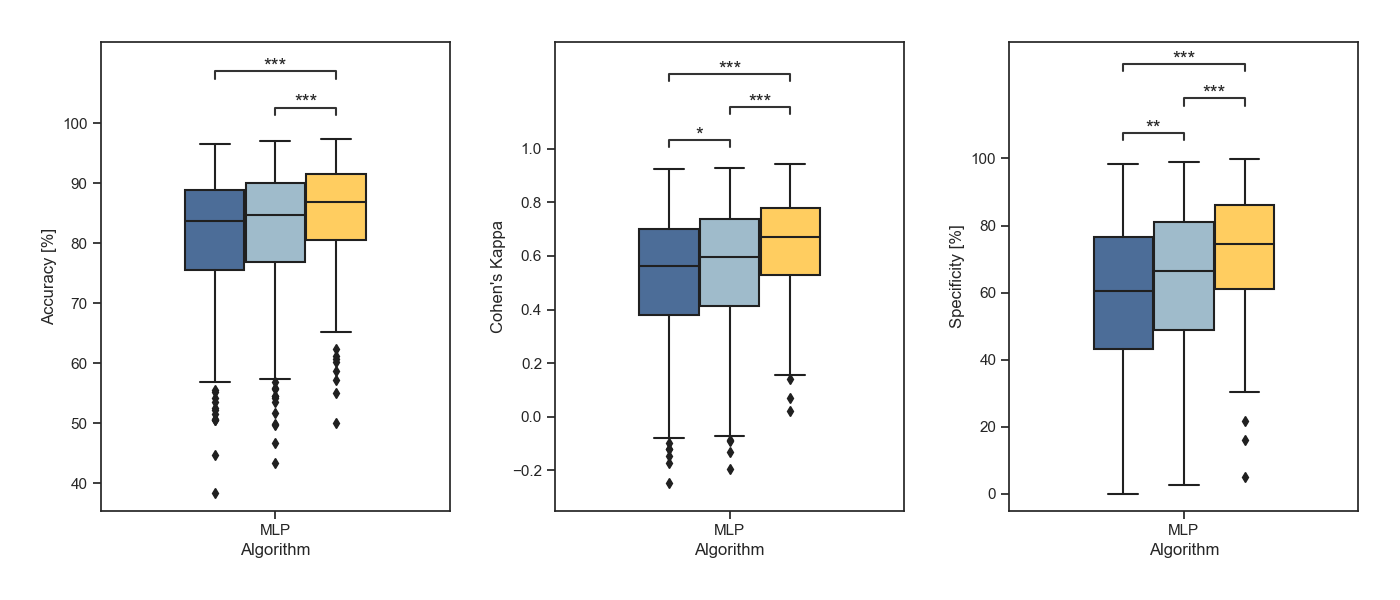

In [14]:
plot_algorithm_result(df_metric, "MLP")

### XGBoost

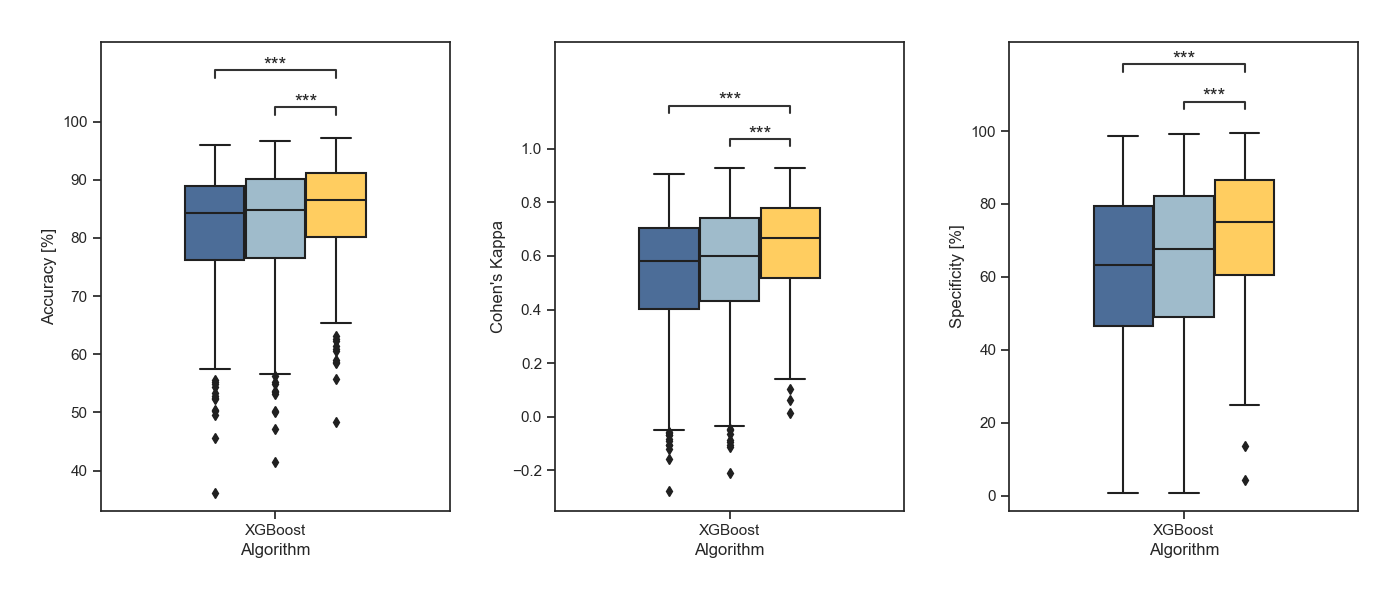

In [15]:
plot_algorithm_result(df_metric, "XGBoost")

### Support Vector Machine

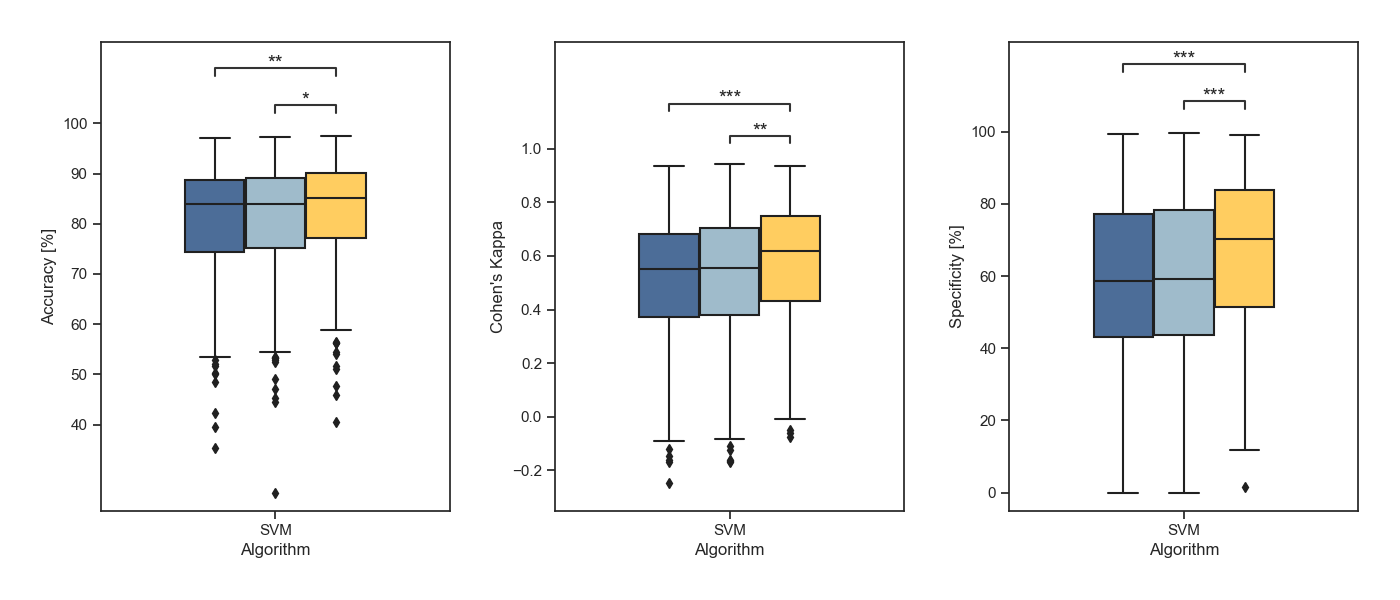

In [16]:
plot_algorithm_result(df_metric, "SVM")

### Adaptive Boosting

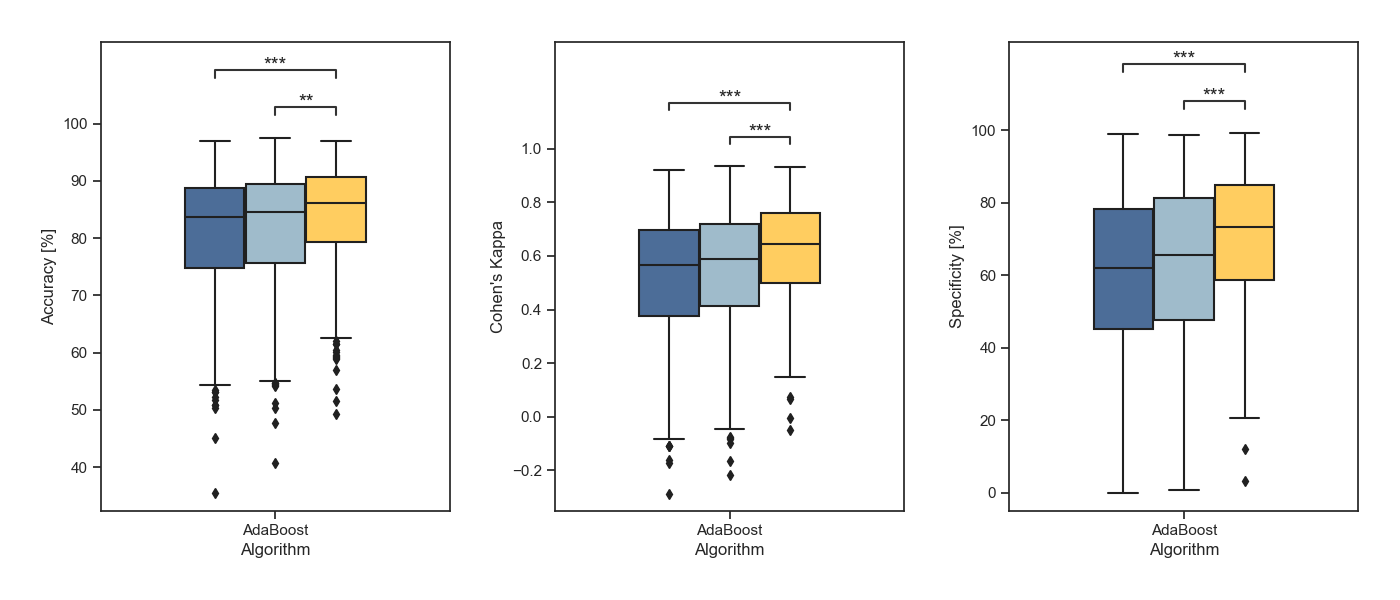

In [17]:
plot_algorithm_result(df_metric, "AdaBoost")

### Random Forest

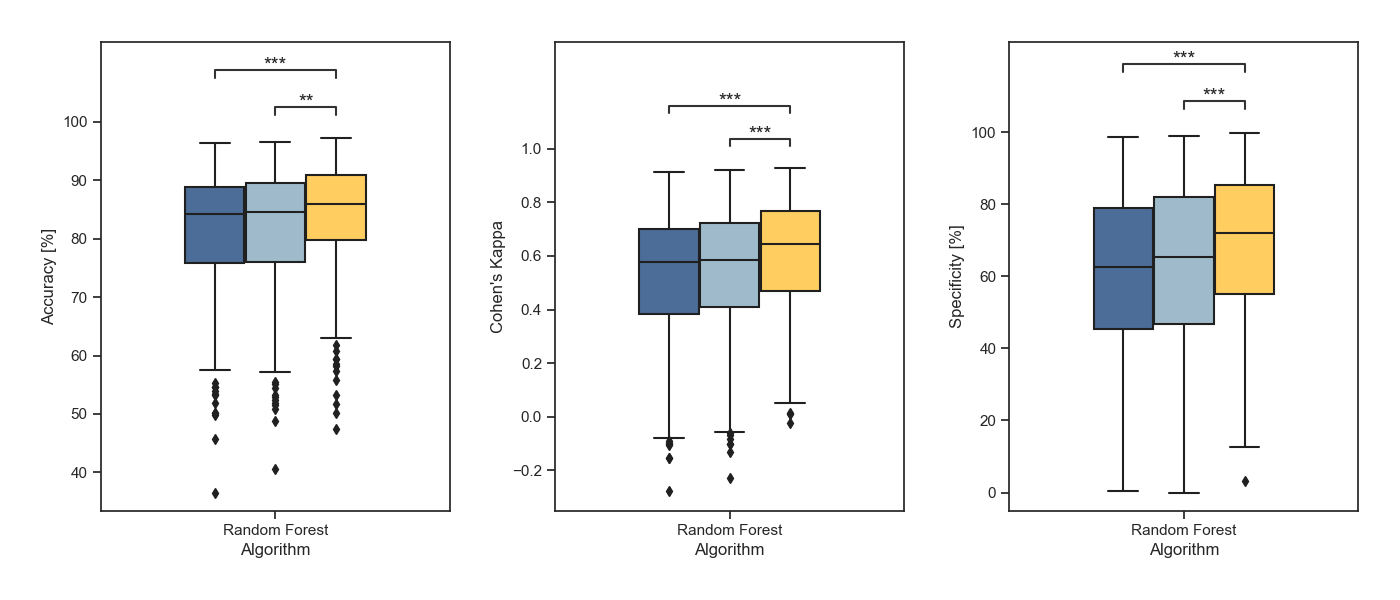

In [18]:
plot_algorithm_result(df_metric, "Random Forest")

### Long-Short Term Memory

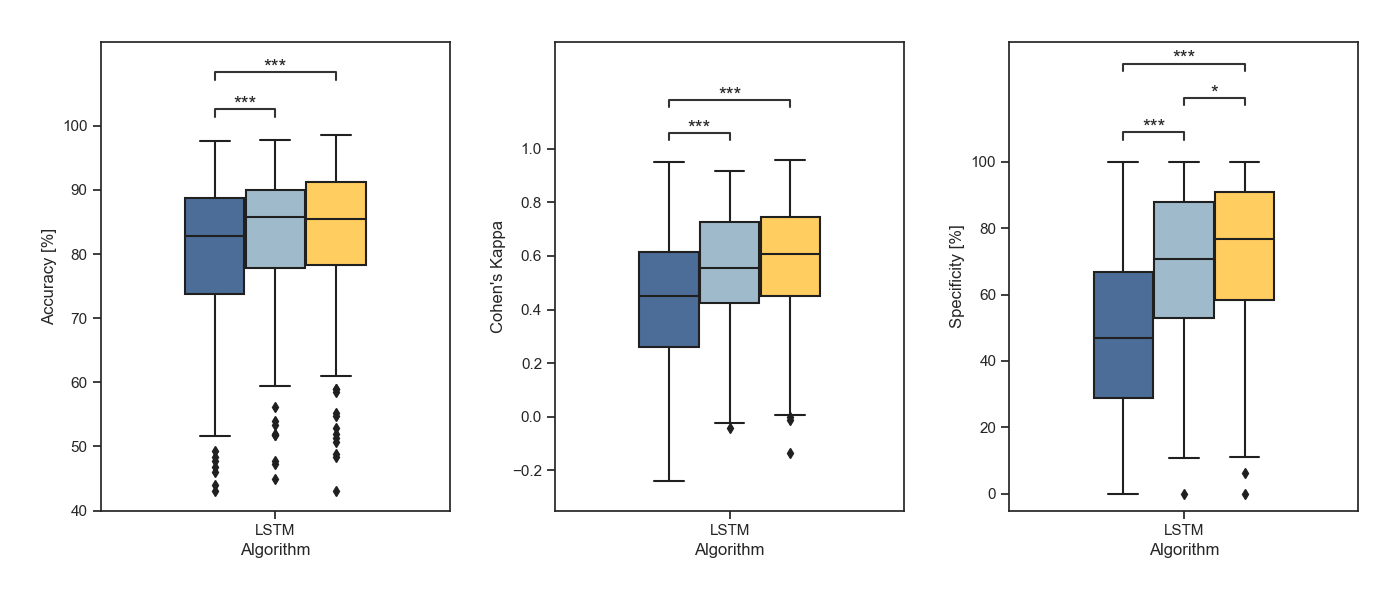

In [19]:
plot_algorithm_result(df_metric, "LSTM")

### Temporal Convolutional Network

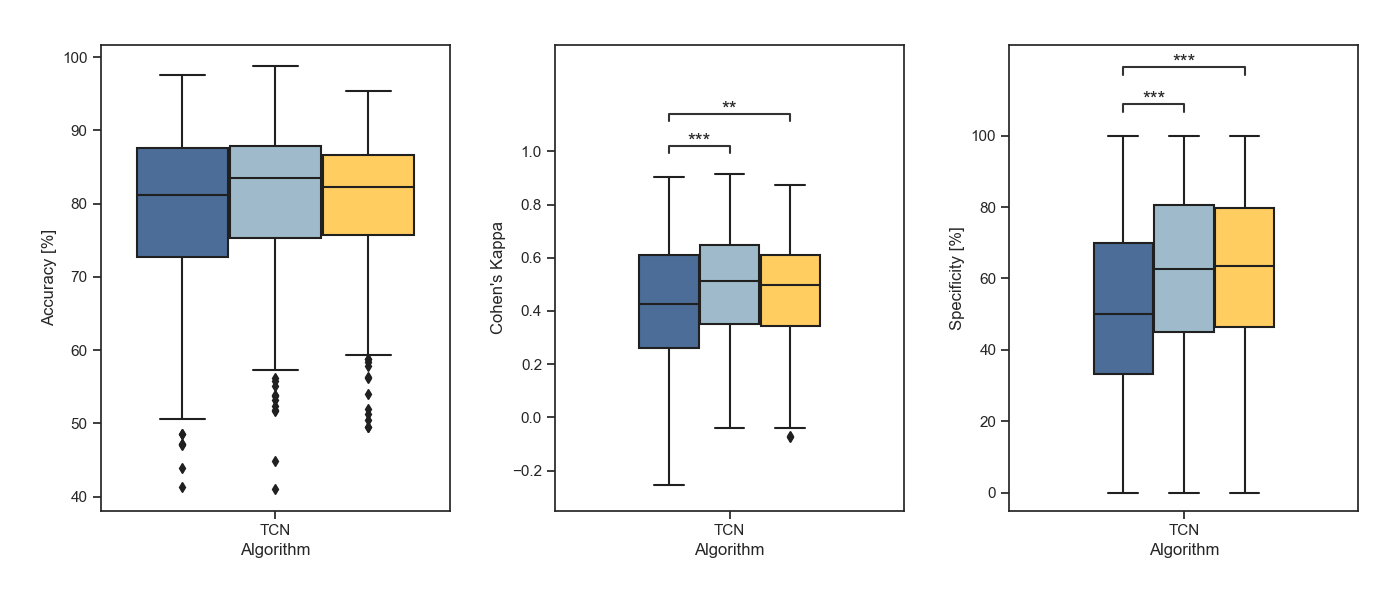

In [20]:
plot_algorithm_result(df_metric, "TCN")